# Coupled Oscillators

$$|-----k_0-----\mathbf{m_0}-----k_1-----\mathbf{m_1}-----k_2-----|$$  



Say there are two masses $m_0$,$m_1$ coupled to 3 springs with different spring constants$k_0, k_1, k_2$.  
$v_{in_0},v_{in_1}, x_{in_0}, x_{in_1}$ are the initial velocities and equilibrium positions of two masses respectively.  
$a_0,a_1,v_0,v_1,x_0,x_1$ are the acceleration, velocities and displacement of two masses respectively.  
$\therefore$ by working out Newton's Laws we get the equations for acceleration then velocity and then positions,  
$$ a_0=\dfrac{-k_0x_0-k_1(x_0-x_1)}{m_0}$$
$$ a_1=\dfrac{-k_2x_1+k_1(x_0-x_1)}{m_1}$$
$$$$
$$v_0=v_{in_0}+a_0.dt$$
$$v_1=v_{in_1}+a_1.dt$$
$$$$
$$x_0=x_{in_0}+v_0.dt$$
$$x_1=x_{in_1}+v_1.dt$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def coupledosc(m:'list of masses',k:'list of coeff',x_in:'init pos of masses',v_in:'init vel of masses',dt,time):
    
    # Create zero element arrays for each parameter
    a = np.zeros(len(m)) 
    x = np.zeros(len(m))
    v = np.zeros(len(m))
    
    # Create lists for x values. A list of displacement values for each mass.
    x_values = [[] for i in range(len(m))]
    
    # List for time values
    time_values = []
    
    
    for i in range(time+1):
        for j in range(len(m)):
            if j == 0:
                a[j] = (((-k[j]*x_in[j])-(k[j+1]*(x_in[j]-x_in[j+1]))))/m[j]
            else:
                a[j] = (((-k[j+1]*x_in[j]))+(k[j]*(x_in[j-1]-x_in[j])))/m[j]
            
            v[j] = v_in[j] + a[j]*dt
            
            x[j] = x_in[j] + v[j]*dt
            
            x_values[j].append(x[j]) # append displacement values of each mass to it's respective list using index.
            
            # Update the initial values of x and v
            x_in[j] = x[j]
            v_in[j] = v[j]
            
        # Append the time values in list    
        time_values.append(i)
    
    # Plotting
    fig, ax = plt.subplots(len(m)+1,1,figsize=(20,15),sharex=True)
    
    # make a list of colours equal to number of masses/make a list of more colours beforehand
    colours=['C0','C1','C2','C3']    # 4 colours for 4 masses, but if we use less than 4 masses it will work too 
    # as we are using index to choose colour.
    
    for i in range(len(m)):
        ax[i].plot(time_values,x_values[i],c=colours[i],label=f"Mass {i+1} = {m[i]}")
        ax[i].legend()
        ax[i].set_ylabel("Displacement from mean position")
        ax[len(m)].plot(time_values,x_values[i],c=colours[i],label=f"Mass {i+1} = {m[i]}")
        ax[len(m)].legend()
        ax[len(m)].set_xlabel("Time in seconds")
        ax[len(m)].set_ylabel("Displacement from mean position")
        plt.suptitle("Coupled Harmonic Oscillators",fontsize=30)

In [11]:
# Example 1 Parameters
# Masses
m = [1,1]

# Spring constants
k = [1,0.5,1]  

# Initial Values
x_in = [1,0]  
v_in = [0,0]  


dt = 0.01
time = 5000

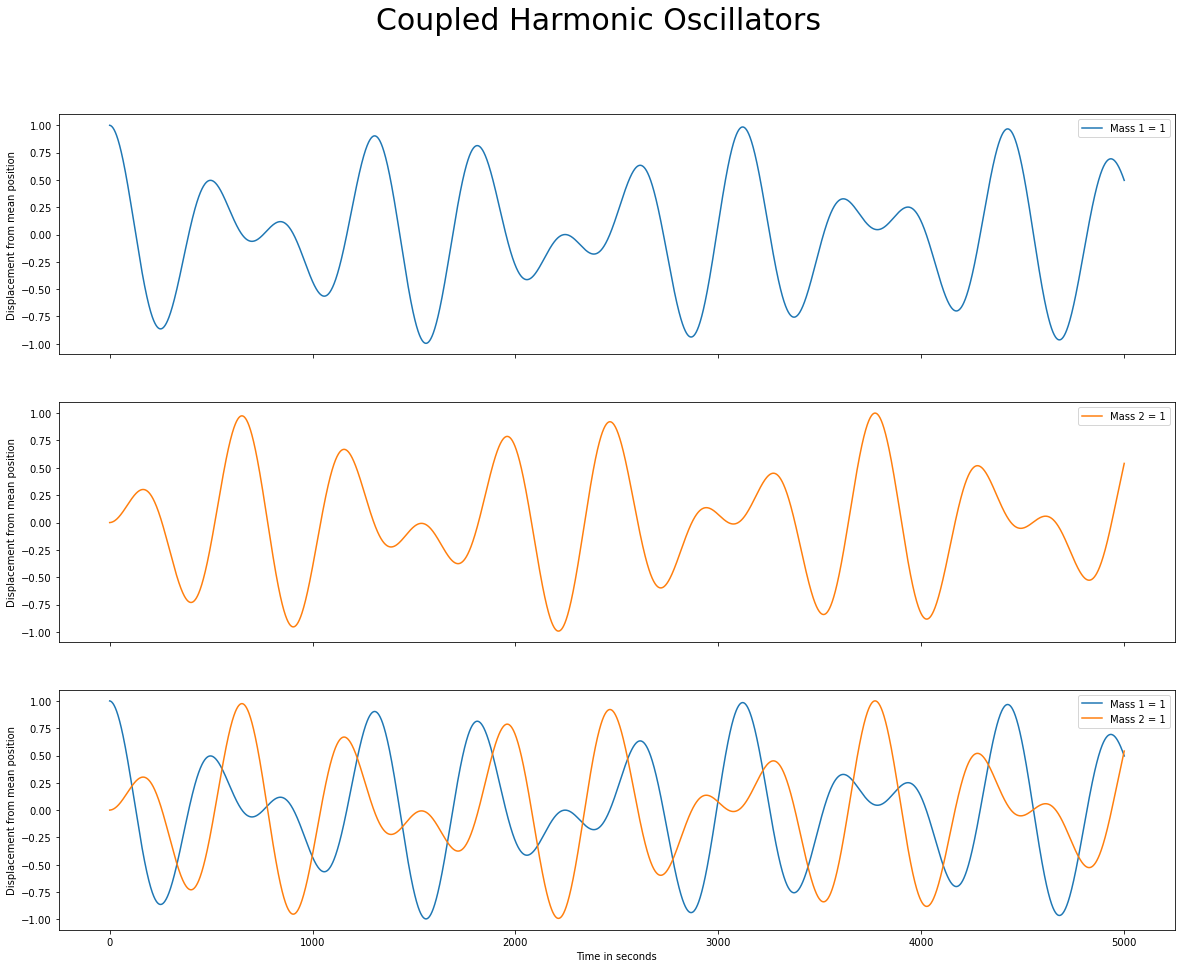

In [12]:
coupledosc(m,k,x_in,v_in,dt,time)

### Example with 3 masses and 4 springs:  
$$$$
$$$$
$$|-----k_0-----\mathbf{m_0}-----k_1-----\mathbf{m_1}-----k_2-----\mathbf{m_2}-----k_3-----|$$

In [13]:
# Example 2 Parameters
# Masses
m = [1.5,2,1]

# Spring constants
k = [1,0.5,1,2]  

# Initial Values
x_in = [1,0,0]  
v_in = [0,0,0]  


dt = 0.01
time = 5000

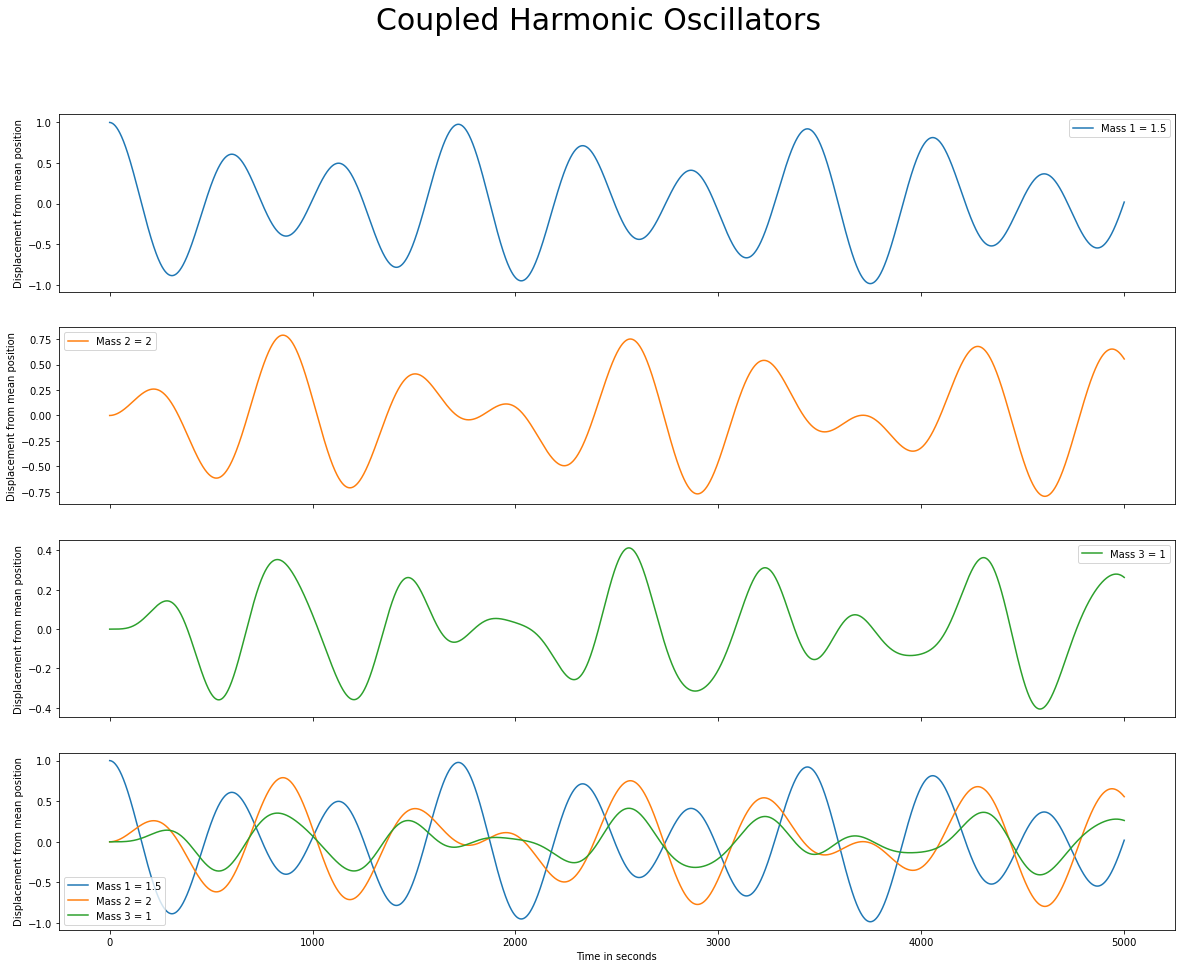

In [14]:
coupledosc(m,k,x_in,v_in,dt,time)